### Concrete Compressive Strength

#### Dataset description:
The concrete compressive strength (in MPa) is a highly nonlinear function of age and ingredients

Number of instances: 1030 

Number of Attributes: 9 

Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable 

Missing Attribute Values: None 

Link: http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [1]:
filename = "f:/datasets/Concrete_Data.xls"
import pandas
ccs = pandas.read_excel(filename)

In [2]:
ccs.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0,228,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0,228,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0,192,0.0,978.4,825.5,360,44.296075


In [3]:
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C66F518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD76B70>]], dtype=object)

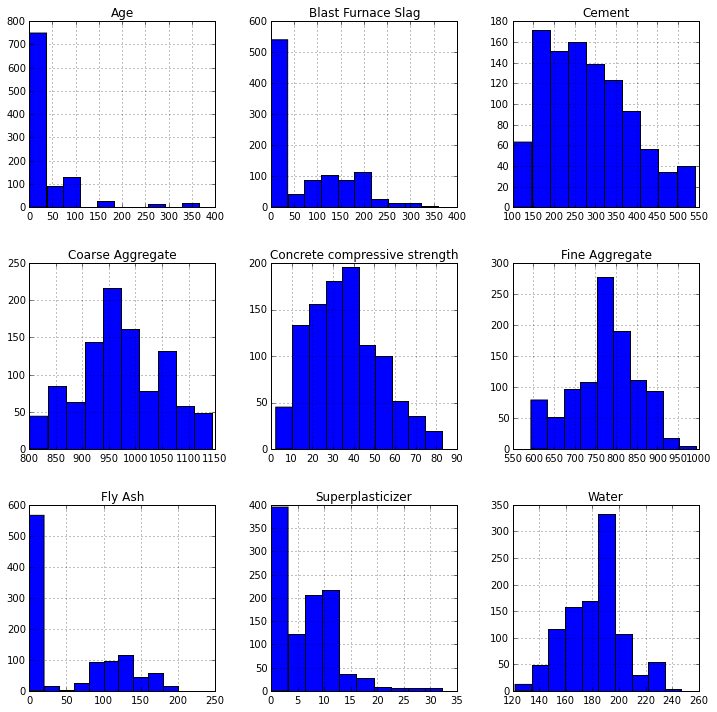

In [4]:
ccs.hist(figsize=(12,12))

In [5]:
ccs.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


To check the relations between Concrete compressive strength and the rest of the factors, we'll use a scatter plot to plot the strength vs every factor

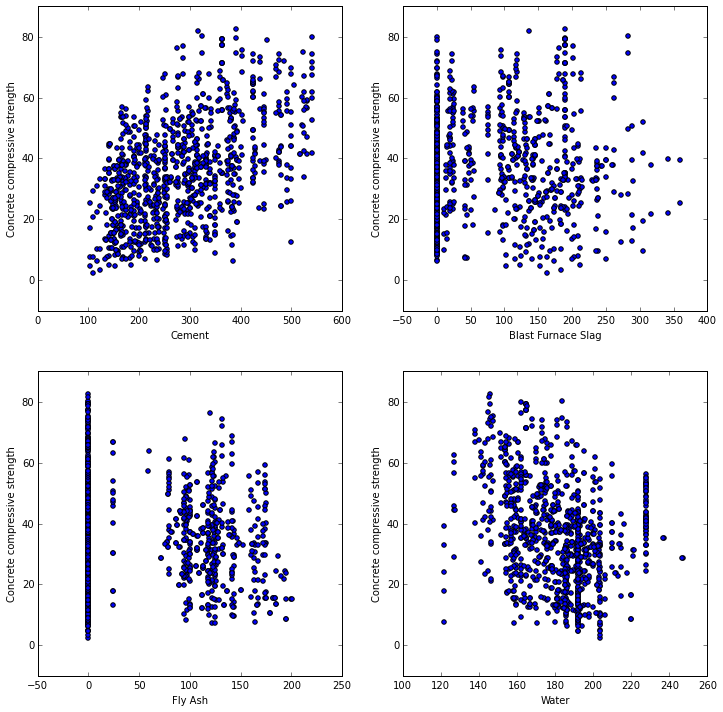

In [25]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(12, 12))
ccs.plot(kind='scatter', x='Cement', y='Concrete compressive strength', ax=axs[0][0]);
ccs.plot(kind='scatter', x='Blast Furnace Slag', y='Concrete compressive strength', ax=axs[0][1]);
ccs.plot(kind='scatter', x='Fly Ash', y='Concrete compressive strength', ax=axs[1][0]);
ccs.plot(kind='scatter', x='Water', y='Concrete compressive strength', ax=axs[1][1]);

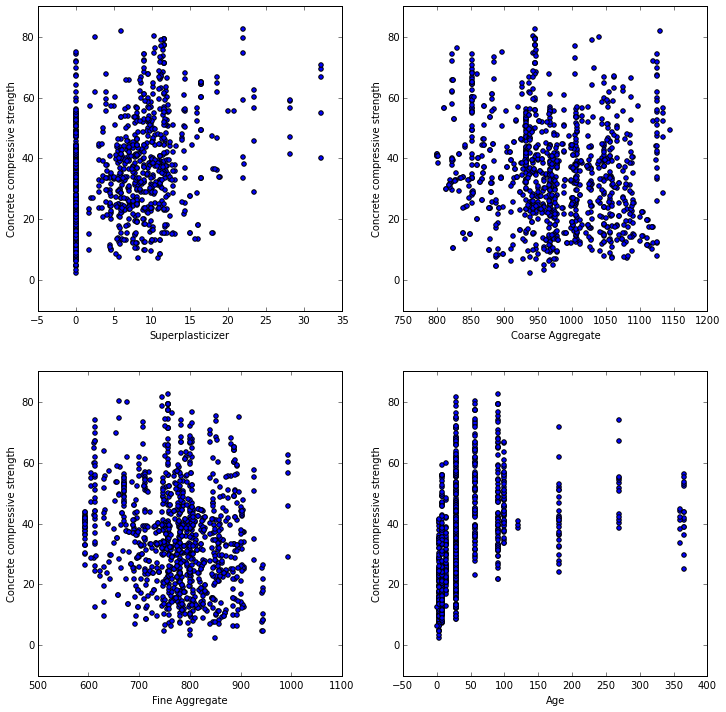

In [26]:
fig, axs = plt.subplots(2,2, figsize=(12, 12))
ccs.plot(kind='scatter', x='Superplasticizer', y='Concrete compressive strength', ax=axs[0][0]);
ccs.plot(kind='scatter', x='Coarse Aggregate', y='Concrete compressive strength', ax=axs[0][1]);
ccs.plot(kind='scatter', x='Fine Aggregate', y='Concrete compressive strength', ax=axs[1][0]);
ccs.plot(kind='scatter', x='Age', y='Concrete compressive strength', ax=axs[1][1]);

There are some apparent relationships between the factors and the concrete strenght: 
- a positive linear relation with the Cement content 
- a negative relation with the Water content
- a positive relation with the Superplasticizer content

Some other relations could be more subtle and maybe there are not explicit in the graphs.

The idea is to create a linear regression model to try to model the concrete strenght using all the factors on the dataset. With  it will be possible to quantify the strengh of the relations of each factor with the target variable

First step is creating a validation set to choose the best model, and a testing set to check the performance of that model at the end 

In [33]:
factors = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age"]
target = ["Concrete compressive strength"]
from sklearn.cross_validation import train_test_split
X, X_test, y, y_test = train_test_split(ccs[factors], ccs[target], test_size=0.10) #10% test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.111) #10% (of the total) validation set

In [34]:
print X_train.shape, X_val.shape, X_test.shape

(824, 8) (103, 8) (103, 8)


A simple linear regression model

In [35]:
from sklearn import linear_model
clf1 = linear_model.LinearRegression()
clf1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now to check the coeficients:

In [56]:
coefficients = dict(zip(list(X_train.columns), clf1.coef_.tolist()[0])) 

In [57]:
coefficients

{u'Age': 0.11218294357737973,
 u'Blast Furnace Slag': 0.10464520981421797,
 u'Cement': 0.1218640170551402,
 u'Coarse Aggregate': 0.02175319556665372,
 u'Fine Aggregate': 0.025198382889224477,
 u'Fly Ash': 0.08896889851799053,
 u'Superplasticizer': 0.3376511483237278,
 u'Water': -0.12895868425246454}

This shows something similar of what we conclude about the scatter plots: a negative relation with Water content, a positive relation with cement content and with Superplasticizer, plus some other relatively strong relations that we didn´t found, like with Blast Furnace Slag and Fly Ash

To check the performance of the model:

In [59]:
#score computes the coefficient of determination R^2 of the prediction. Best possible score is 1.0
clf1.score(X_val, y_val)

0.68473051460204148

In [62]:
#The root mean squared error. Best possible score is 0
import numpy
from sklearn.metrics import mean_squared_error
y_pred = clf1.predict(X_val)
numpy.sqrt(mean_squared_error(y_val, y_pred))

9.8479286822549934

This RMSE could be compared with the distribution of values of the target variable:

In [65]:
ccs[target].describe()

,Concrete compressive strength
count,1030.000000
mean,35.817836
std,16.705679
min,2.331808
25%,23.707115
50%,34.442774
75%,46.136287
max,82.599225


The RMSE of 9.85 is less than Mean and the S.D. of the Concrete compressive strength

It's possible that a more complex model could do better. Next step is to try doing second-order polynomial combinations of the features

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_val2 = poly.fit_transform(X_val)
X_test2 = poly.fit_transform(X_test)

With second-order polynomial features the training set grows from 8 features to:

In [95]:
 X_train2.shape[1]

45L

In [86]:
clf2 = linear_model.LinearRegression()
clf2.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
#R^2
clf2.score(X_val2, y_val)

0.79927967766175545

In [90]:
#RMSE
y_pred = clf2.predict(X_val2)
numpy.sqrt(mean_squared_error(y_val, y_pred))

7.8577751756947425

The scores are better with this model, which means that there are interrelations between the factors that are important to predict the concrete strength, but now the model is much more difficult to interpret with 45 coefficients

In [96]:
clf2.coef_

array([[  0.00000000e+00,   2.55171881e+00,   2.00675050e+00,
          1.57661799e+00,   1.44775214e+01,   3.42675522e+01,
          2.48722000e+00,   3.59779348e+00,   1.57721478e-01,
         -3.62451728e-04,  -4.25920089e-04,  -1.37359658e-04,
         -4.72245304e-03,  -1.18668470e-02,  -5.40027689e-04,
         -9.58328532e-04,   1.66245914e-04,  -1.98008162e-04,
          2.22633143e-04,  -4.03207506e-03,  -1.23775850e-02,
         -5.23508998e-04,  -6.11862010e-04,   3.92885730e-04,
          3.17765186e-04,  -4.58965341e-03,  -2.02169327e-02,
         -2.58752956e-04,  -4.66148466e-04,   8.21037090e-04,
         -9.12861042e-03,  -3.94107029e-02,  -4.95166194e-03,
         -5.70038996e-03,  -1.56395235e-04,  -5.16015244e-02,
         -1.08811272e-02,  -1.30446301e-02,   2.84747427e-03,
         -3.34704136e-04,  -8.56912216e-04,  -9.88015909e-05,
         -8.47023598e-04,   2.32357211e-04,  -6.06332365e-04]])

Now to check third-order polynomial features:

In [99]:
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_val3 = poly.fit_transform(X_val)
X_test3 = poly.fit_transform(X_test)

In [100]:
X_train3.shape[1]

165L

Now there are 165 features on the training set

In [101]:
clf3 = linear_model.LinearRegression()
clf3.fit(X_train3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
#R^2
clf3.score(X_val3, y_val)

0.85425240171545214

In [103]:
#RMSE
y_pred = clf3.predict(X_val3)
numpy.sqrt(mean_squared_error(y_val, y_pred))

6.6958332453037528

We are obtaining better scores, but the added complexity of the model probably is not worth it

Last test will be with fourth-order features:

In [105]:
poly = PolynomialFeatures(degree=4)
X_train4 = poly.fit_transform(X_train)
X_val4 = poly.fit_transform(X_val)
X_test4 = poly.fit_transform(X_test)
X_train4.shape[1]

495L

In [106]:
clf4 = linear_model.LinearRegression()
clf4.fit(X_train4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
#R^2
clf4.score(X_val4, y_val)

-6.1635915710904552

In [110]:
#RMSE
y_pred = clf4.predict(X_val4)
numpy.sqrt(mean_squared_error(y_val, y_pred))

46.942837166100738

With 4 order features the scores are much worse, so this is the point were the model is too complex and is overfitting

The model picked based on the error measures is the linear regression with third-order polynomial features

The final RMSE score of the model is:

In [112]:
y_pred = clf3.predict(X_test3)
numpy.sqrt(mean_squared_error(y_test, y_pred))

5.5467249828513348

With a scatter matrix plot it is possible to visualize some of the interrelations between the factors on the dataset, for example between water and superplasticizer:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012ACD860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000029C83EF0>]], dtype=object)

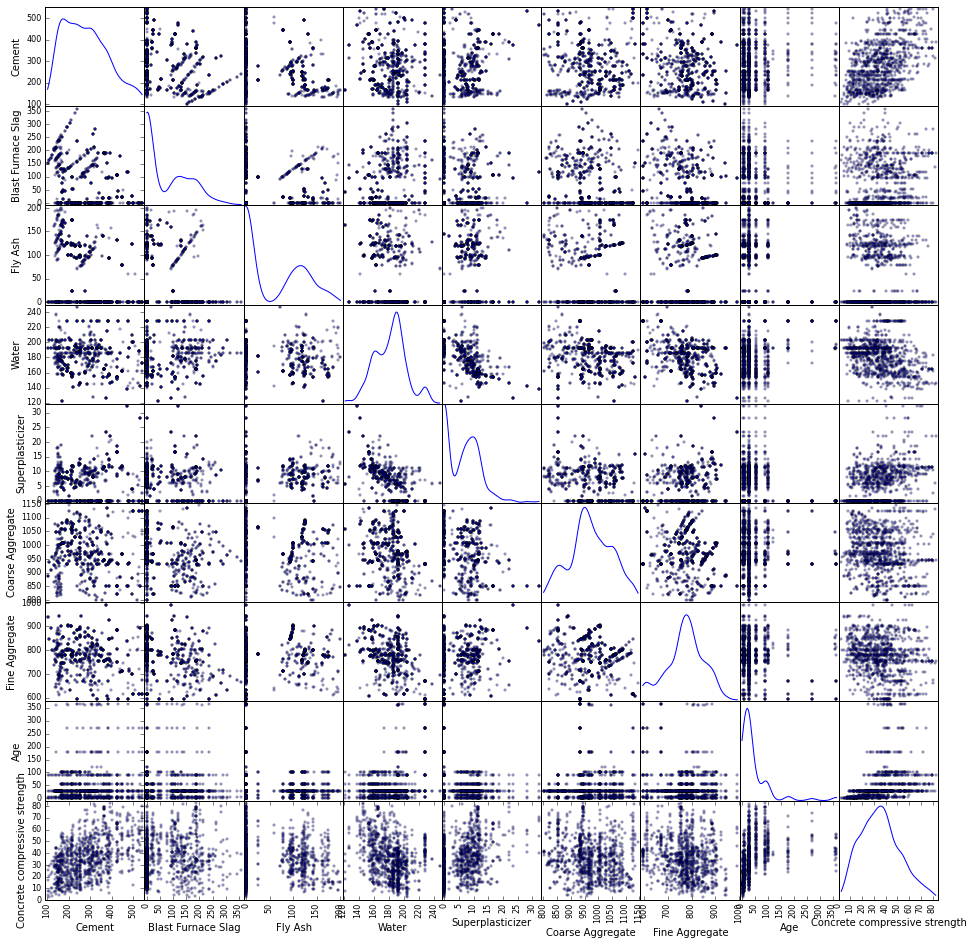

In [111]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ccs, alpha=0.3, figsize=(16, 16), diagonal='kde')